In [31]:
#Importing necessary libaries for data analysis and predictive modelling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [32]:
dataset = pd.read_csv("/content/Indian Liver Patient Dataset (ILPD).csv")
dataset.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


**Observation 1**: There are 4 missing values in alkphos column

In [34]:
#Filling missing values
dataset["alkphos"] = dataset["alkphos"].fillna(dataset["alkphos"].median())

In [35]:
dataset.isnull().sum()

,0
age,0
gender,0
tot_bilirubin,0
direct_bilirubin,0
tot_proteins,0
albumin,0
ag_ratio,0
sgpt,0
sgot,0
alkphos,0


In [36]:
dataset.shape

(583, 11)

In [37]:
# Checking for duplicate rows
dataset.drop_duplicates(inplace=True)
dataset.shape

(570, 11)

**Observation 2**: There were 13 rows which were duplicates. They have been removed now.

**Observation 3**: The gender column will have to be encoded. The is_patient column will have to be converted to category.

In [38]:
dataset.describe()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,44.849123,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.947877,1.287719
std,16.242182,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.318513,0.453097
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [39]:
dataset["is_patient"].value_counts()

,count
is_patient,
1,406
2,164


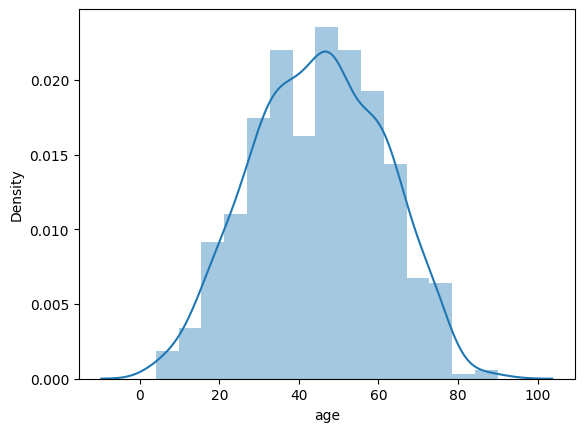

In [40]:
#Univariate Analysis
sns.distplot(dataset["age"],kde=True)
plt.show()

**Observation 4**: The Age column is almost normally distributed. Therefore, we do not have to transform it.

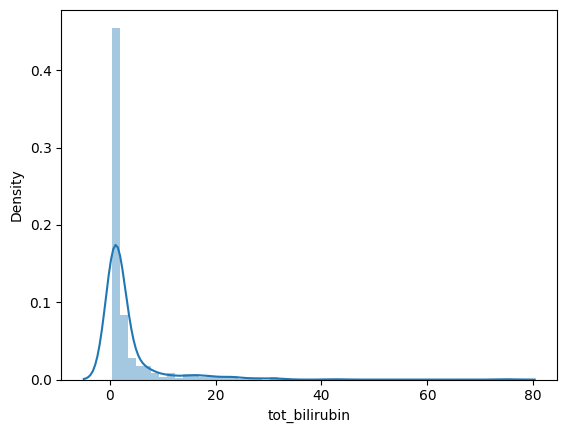

In [41]:
sns.distplot(dataset["tot_bilirubin"],kde=True)
plt.show()

In [42]:
dataset["tot_bilirubin"].skew()

4.869458703859958

**Observation 5**: The tot_bilirubin is positively skewed. We will have to transform it.

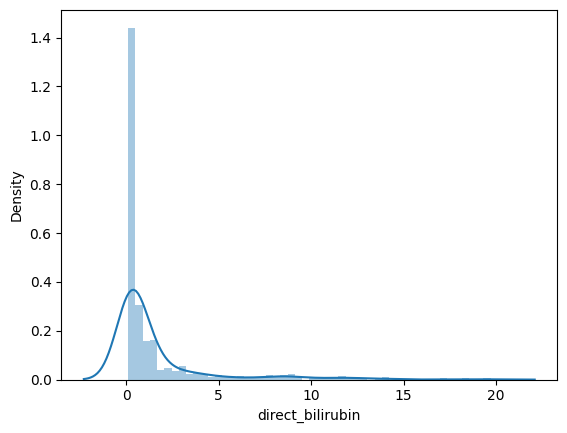

In [43]:
sns.distplot(dataset["direct_bilirubin"],kde=True)
plt.show()

In [44]:
dataset["direct_bilirubin"].skew()

3.1876850011164097

**Observation 6**: The direct_bilirubin column is positively skewed. It will have to be normalized as well.

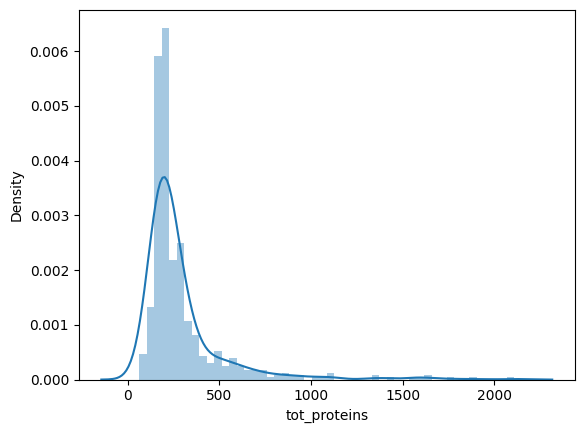

In [45]:
sns.distplot(dataset["tot_proteins"],kde=True)
plt.show()

In [46]:
dataset["tot_proteins"].skew()

3.7284052766849434

**Observation 7:** The tot_proteins column is positively skewed. Hence, we will have to transform it.

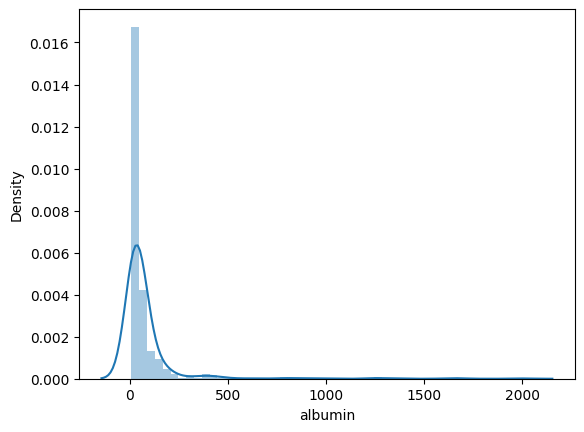

In [47]:
sns.distplot(dataset["albumin"],kde=True)
plt.show()

In [48]:
dataset["albumin"].skew()

6.695054145869701

**Observation 8**: The albumin column is positively skewed. It will have to be transformed.

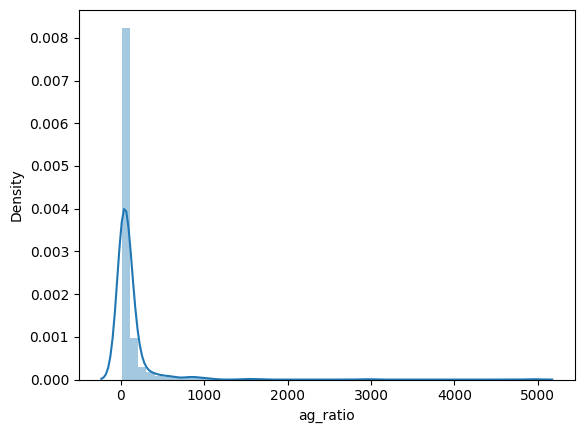

In [49]:
sns.distplot(dataset["ag_ratio"],kde=True)
plt.show()

In [50]:
dataset["ag_ratio"].skew()

10.559418140529846

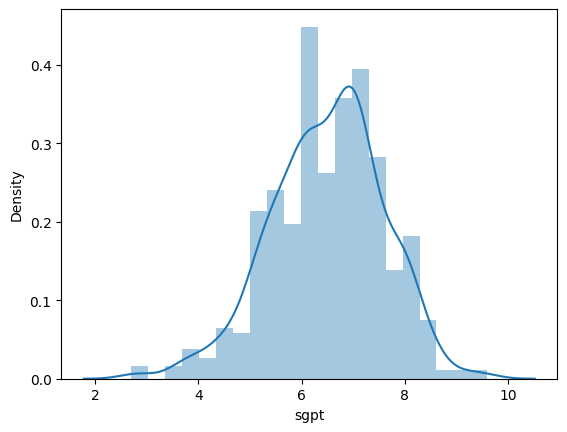

In [51]:
sns.distplot(dataset["sgpt"],kde=True)
plt.show()

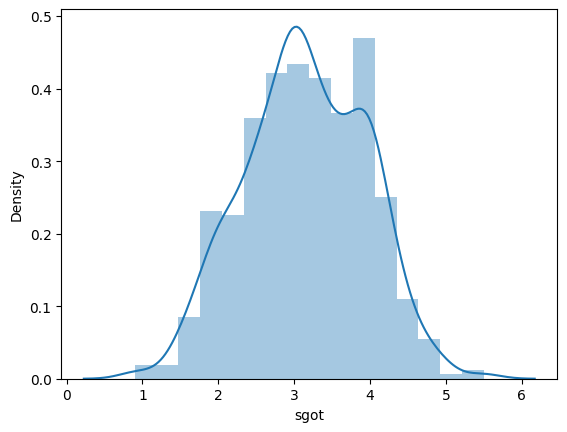

In [52]:
sns.distplot(dataset["sgot"],kde=True)
plt.show()

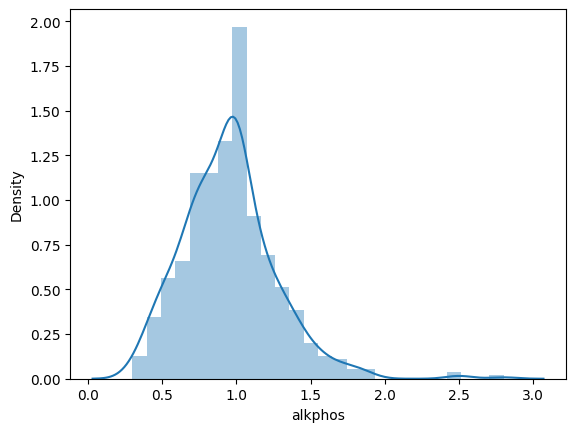

In [53]:
sns.distplot(dataset["alkphos"],kde=True)
plt.show()

**Observation 9**: The tot_bilirubin, direct_bilirubin, tot_proteins, albumin and ag_ratio columns will have to be transformed.

In [54]:
dataset["gender"].value_counts()

,count
gender,
Male,430
Female,140


In [55]:
#Encoding gender column
dataset["gender"] = dataset["gender"].map({"Male":"1","Female":"0"})

In [56]:
dataset["gender"] = dataset["gender"].astype(int)

In [57]:
dataset.dtypes

,0
age,int64
gender,int64
tot_bilirubin,float64
direct_bilirubin,float64
tot_proteins,int64
albumin,int64
ag_ratio,int64
sgpt,float64
sgot,float64
alkphos,float64


In [58]:
dataset["is_patient"].value_counts()

,count
is_patient,
1,406
2,164


**Observation 10**: In the dataset provided, there was no mention of which number corresponds to which observation. Let's assume that 1 corresponds to no and 2 corresponds to yes.

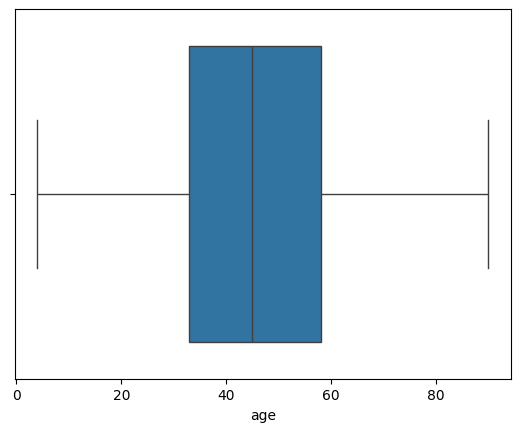

In [59]:
#Removing outliers in our data if present
sns.boxplot(x="age",data=dataset)
plt.show()

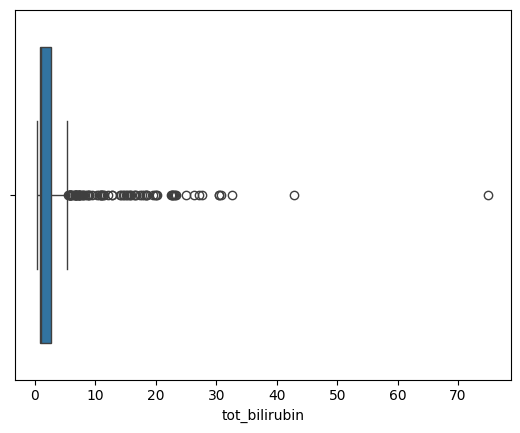

In [60]:
sns.boxplot(x="tot_bilirubin",data=dataset)
plt.show()

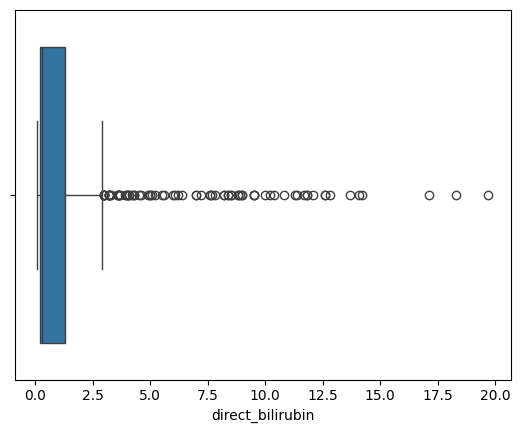

In [61]:
sns.boxplot(x="direct_bilirubin",data=dataset)
plt.show()

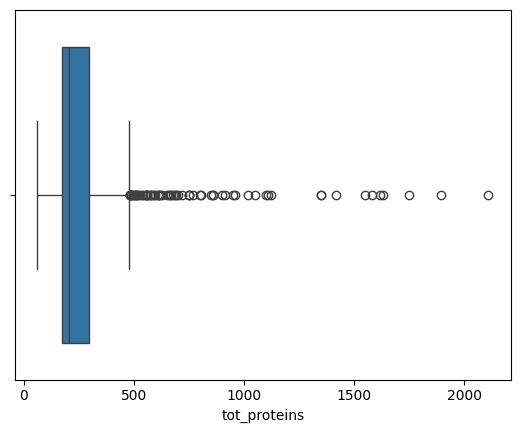

In [62]:
sns.boxplot(x="tot_proteins",data=dataset)
plt.show()

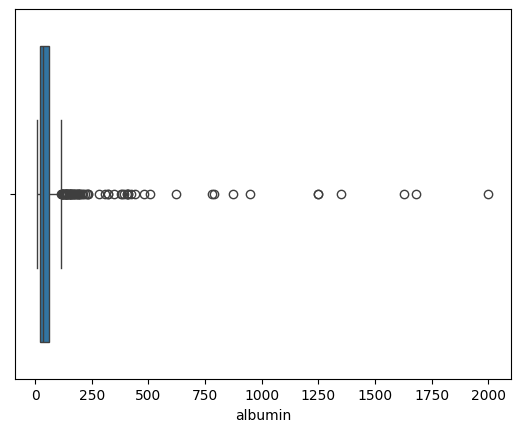

In [63]:
sns.boxplot(x="albumin",data=dataset)
plt.show()

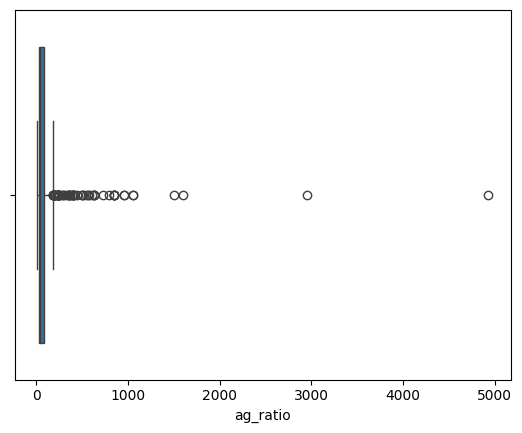

In [64]:
sns.boxplot(x="ag_ratio",data=dataset)
plt.show()

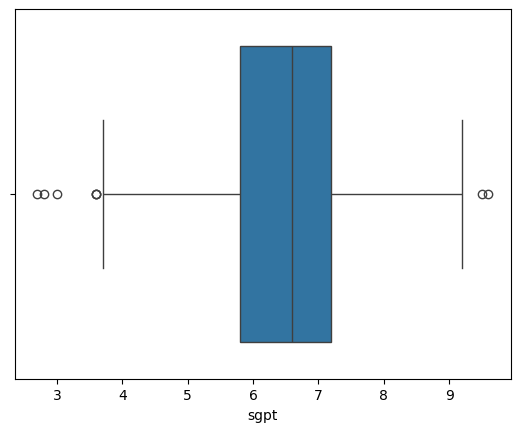

In [65]:
sns.boxplot(x="sgpt",data=dataset)
plt.show()

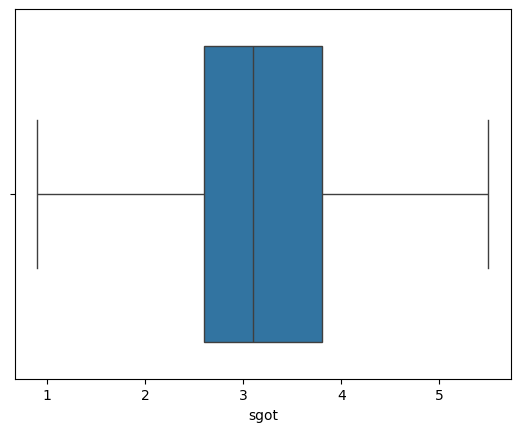

In [66]:
sns.boxplot(x="sgot",data=dataset)
plt.show()

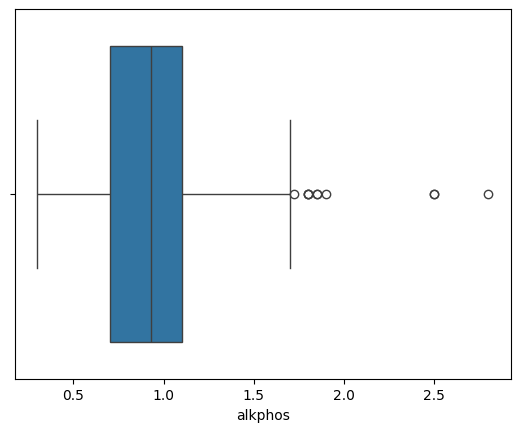

In [67]:
sns.boxplot(x="alkphos",data=dataset)
plt.show()

**Observation 11**: There are no outliers in age and sgot columns.

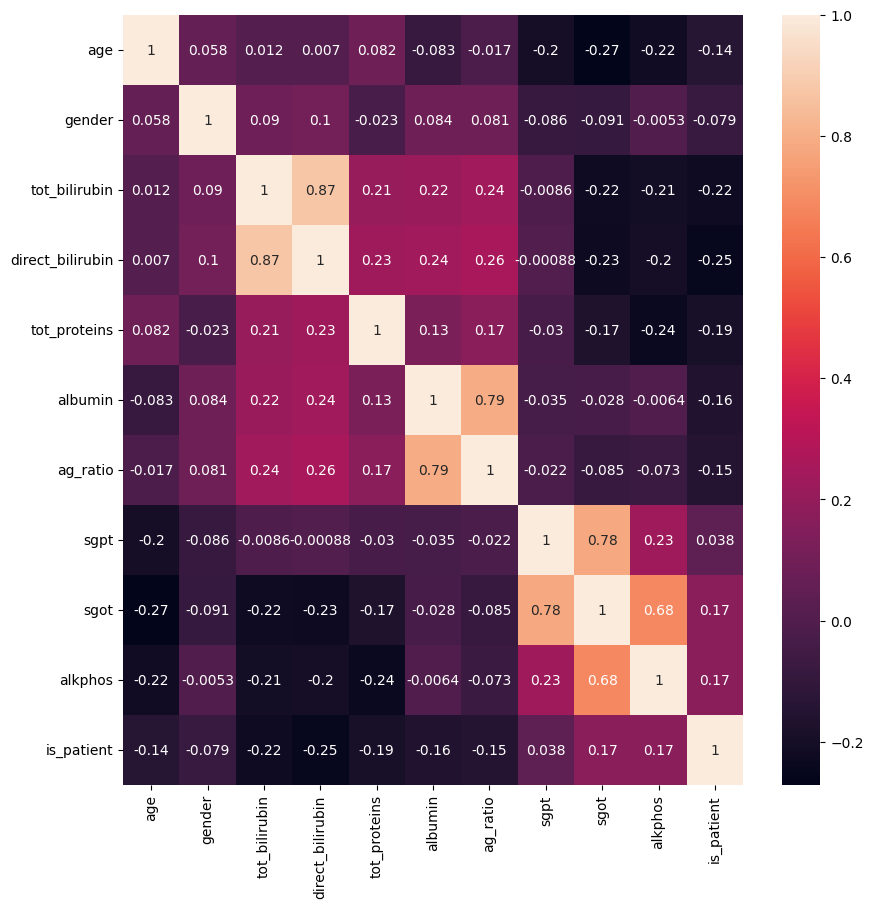

In [68]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [69]:
#Data Transformation
dataset["tot_bilirubin"] = np.log2(dataset["tot_bilirubin"]+1)

In [70]:
dataset["tot_bilirubin"].skew()

1.7314383064442544

In [71]:
#Data Transformation
dataset["direct_bilirubin"] = np.log2(dataset["direct_bilirubin"]+1)

In [72]:
dataset["direct_bilirubin"].skew()

1.689599204169964

In [73]:
#Data Transformation
dataset["tot_proteins"] = np.log2(dataset["tot_proteins"]+1)

In [74]:
dataset["tot_proteins"].skew()

1.3263973386022516

In [75]:
#Data Transformation
dataset["albumin"] = np.log2(dataset["albumin"]+1)

In [76]:
dataset["albumin"].skew()

1.4706642266392198

In [77]:
#Data Transformation
dataset["ag_ratio"] = np.log2(dataset["ag_ratio"]+1)

In [78]:
dataset["ag_ratio"].skew()

1.246183035226115

In [79]:
dataset.isnull().sum()

,0
age,0
gender,0
tot_bilirubin,0
direct_bilirubin,0
tot_proteins,0
albumin,0
ag_ratio,0
sgpt,0
sgot,0
alkphos,0


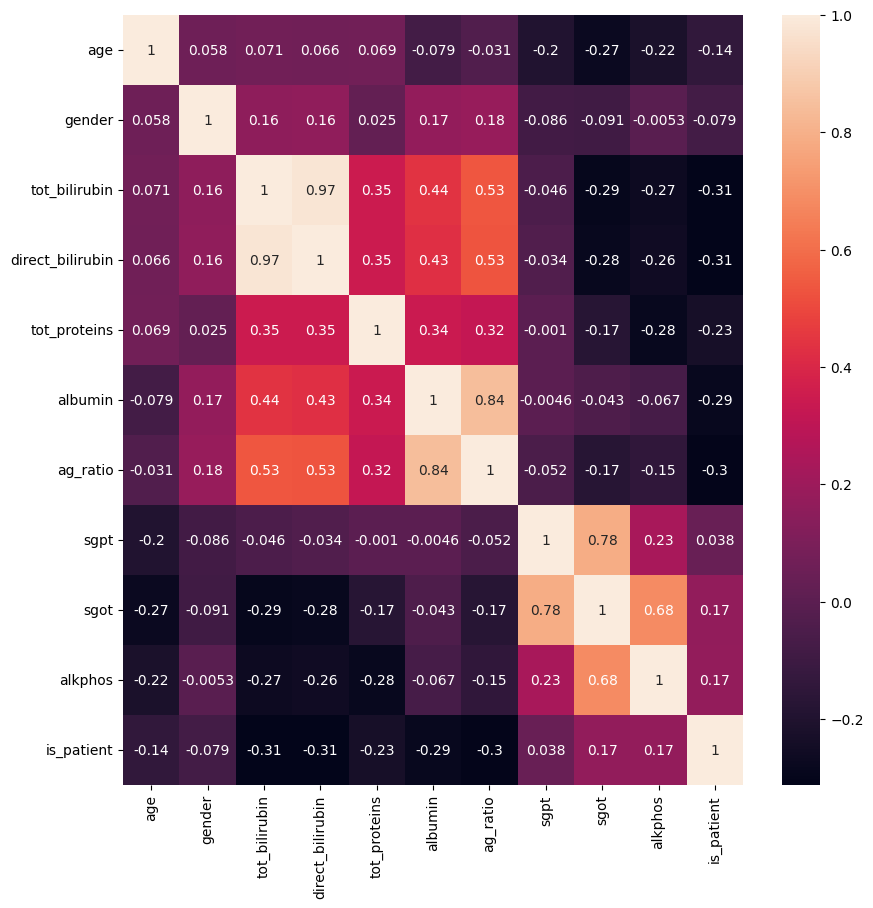

In [80]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

**Observation 12**: The correlations of gender, sgot and sgpt are low wrt is_patient. Therefore, we can drop these 2 columns

In [81]:
dataset.shape

(570, 11)

In [82]:
dataset.drop(columns=["gender","sgpt","sgot"],inplace=True)

In [83]:
#Removing outliers
q1 = dataset["tot_bilirubin"].quantile(0.25)
q3 = dataset["tot_bilirubin"].quantile(0.75)
IQR = q3 - q1
min_value = q1 - (1.5*IQR)
max_value = q3 + (1.5*IQR)
data_1 = dataset[(dataset["tot_bilirubin"] >= min_value) & (dataset["tot_bilirubin"] <= max_value)]

**Observation 13**: 51 rows have been lost while removing tot_bilirubin outliers.

In [84]:
q1 = data_1["direct_bilirubin"].quantile(0.25)
q3 = data_1["direct_bilirubin"].quantile(0.75)
IQR = q3 - q1
min_value = q1 - (1.5*IQR)
max_value = q3 + (1.5*IQR)
data_2 = data_1[(data_1["direct_bilirubin"] >= min_value) & (data_1["direct_bilirubin"] <= max_value)]

**Observation 14**: 39 rows have been lost while removing direct_bilirubin outliers.

In [85]:
q1 = data_2["tot_proteins"].quantile(0.25)
q3 = data_2["tot_proteins"].quantile(0.75)
IQR = q3 - q1
min_value = q1 - (1.5*IQR)
max_value = q3 + (1.5*IQR)
data_3 = data_2[(data_2["tot_proteins"] >= min_value) & (data_2["tot_proteins"] <= max_value)]

**Observation 15**: 29 rows have been lost while removing tot_proteins outliers.

In [86]:
q1 = data_3["albumin"].quantile(0.25)
q3 = data_3["albumin"].quantile(0.75)
IQR = q3 - q1
min_value = q1 - (1.5*IQR)
max_value = q3 + (1.5*IQR)
data_4 = data_3[(data_3["albumin"] >= min_value) & (data_3["albumin"] <= max_value)]

**Observation 16**: 19 rows have been lost while removing albumin column outliers.

In [87]:
q1 = data_4["ag_ratio"].quantile(0.25)
q3 = data_4["ag_ratio"].quantile(0.75)
IQR = q3 - q1
min_value = q1 - (1.5*IQR)
max_value = q3 + (1.5*IQR)
data_5 = data_4[(data_4["ag_ratio"] >= min_value) & (data_4["ag_ratio"] <= max_value)]

**Observation 17**: 8 rows have been lost while removing ag_ration column outliers.

In [88]:
q1 = data_5["alkphos"].quantile(0.25)
q3 = data_5["alkphos"].quantile(0.75)
IQR = q3 - q1
min_value = q1 - (1.5*IQR)
max_value = q3 + (1.5*IQR)
data = data_5[(data_5["alkphos"] >= min_value) & (data_5["alkphos"] <= max_value)]

**Observation 18**: 17 rows have been lost while removing alphos column outliers.

**Obervation 19**: A total ot 163 rows have been lost during outlier treatment.

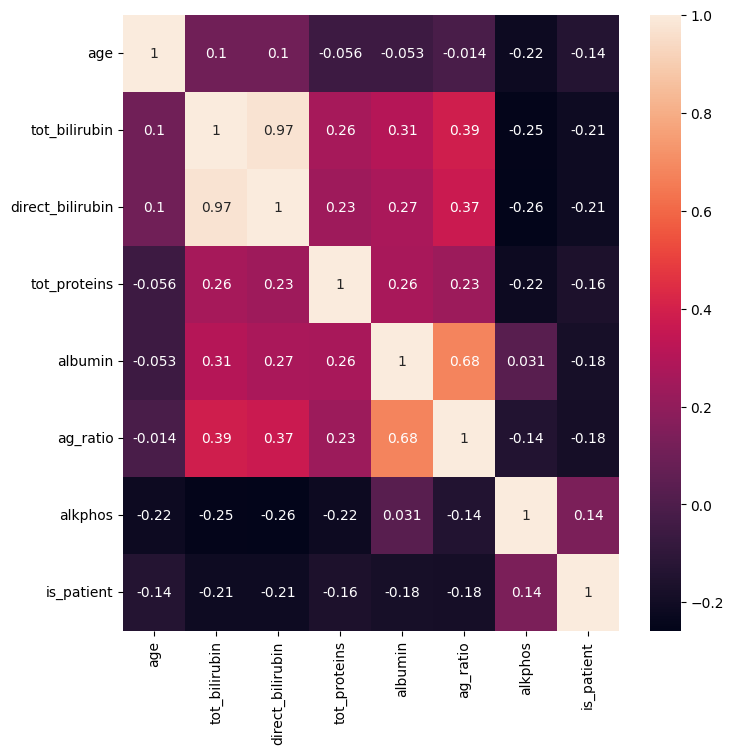

In [89]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [90]:
data["is_patient"].value_counts()

,count
is_patient,
1,256
2,151


In [91]:
data["is_patient"] = data["is_patient"].astype("category")

In [92]:
data.dtypes

,0
age,int64
tot_bilirubin,float64
direct_bilirubin,float64
tot_proteins,float64
albumin,float64
ag_ratio,float64
alkphos,float64
is_patient,category


In [93]:
x = data.drop(columns=["is_patient"])
x.head()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,alkphos
0,65,0.765535,0.137504,7.554589,4.087463,4.247928,0.9
3,58,1.000000,0.485427,7.515700,3.906891,4.392317,1.0
4,72,2.292782,1.584963,7.614710,4.807355,5.906891,0.4
5,46,1.485427,0.765535,7.707359,4.321928,3.906891,1.3
6,26,0.925999,0.263034,7.276124,4.087463,3.700440,1.0


In [94]:
y = data["is_patient"]
y.sample(6)

,is_patient
282,1
301,1
463,1
151,1
139,1
487,1


In [95]:
y.value_counts()

,count
is_patient,
1,256
2,151


Observation:


1.   We will have to transform X data using Standardization
2.   We will have to use Imblearn to balance the dataset.



In [96]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x)
x = pd.DataFrame(ss.transform(x),columns=x.columns)

In [97]:
x.head(2)

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,alkphos
0,1.235139,-0.735328,-0.908017,-0.316455,-1.176334,-1.103018,-0.236643
1,0.812904,-0.206941,-0.016213,-0.397483,-1.404219,-0.936593,0.173377


In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [99]:
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler(random_state=42)
x_resampled, y_resampled = rus.fit_resample(x_train, y_train)


In [100]:
#Voting Classifier: Logistic Regression, SVC, KNeighborsClassifier, Decision Tree

Accuracy score on testing data is: 59.76%
Accuracy score on training data is: 63.97%


<Axes: >

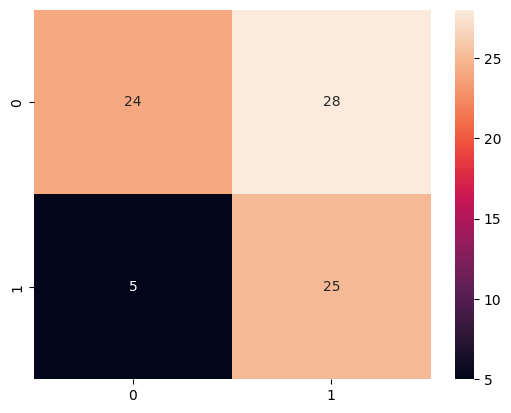

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
lr = LogisticRegression()
lr.fit(x_resampled,y_resampled)
y_pred = lr.predict(x_test)
score = accuracy_score(y_test,y_pred)
print("Accuracy score on testing data is: {:.2f}%".format(score * 100))
y_train_pred = lr.predict(x_resampled)  # Predict on the resampled training set
train_score = accuracy_score(y_resampled, y_train_pred)
print("Accuracy score on training data is: {:.2f}%".format(train_score * 100))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

Observation: The number of False Negatives are high.

Accuracy score on testing data is: 68.29%
Accuracy score on training data is: 80.64%


<Axes: >

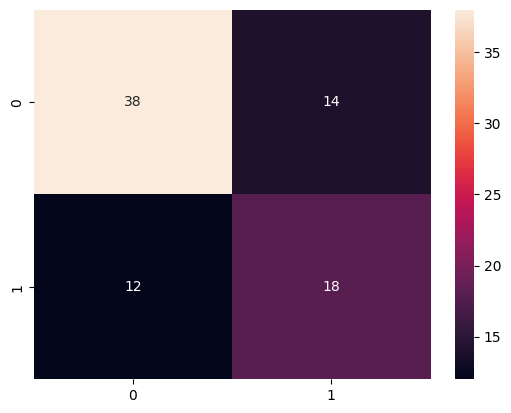

In [104]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4,p=1)
knn.fit(x_resampled,y_resampled)
y_pred = knn.predict(x_test)
score = accuracy_score(y_test,y_pred)
print("Accuracy score on testing data is: {:.2f}%".format(score * 100))
y_train_pred = knn.predict(x_resampled)  # Predict on the resampled training set
train_score = accuracy_score(y_resampled, y_train_pred)
print("Accuracy score on training data is: {:.2f}%".format(train_score * 100))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

Accuracy score on testing data is: 58.54%
Accuracy score on training data is: 71.57%


<Axes: >

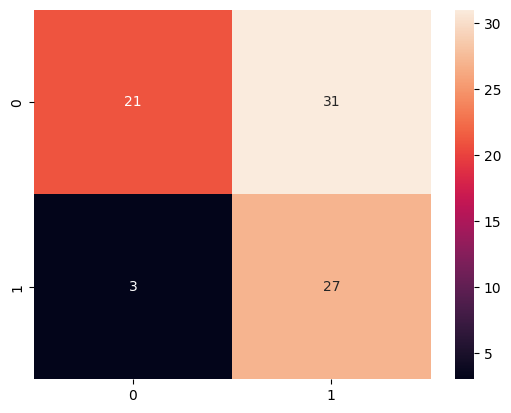

In [105]:
from sklearn.svm import SVC
svc = SVC(kernel="rbf",probability=True)
svc.fit(x_resampled,y_resampled)
y_pred = svc.predict(x_test)
score = accuracy_score(y_test,y_pred)
print("Accuracy score on testing data is: {:.2f}%".format(score * 100))
y_train_pred = svc.predict(x_resampled)  # Predict on the resampled training set
train_score = accuracy_score(y_resampled, y_train_pred)
print("Accuracy score on training data is: {:.2f}%".format(train_score * 100))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

Accuracy score on testing data is: 57.32%
Accuracy score on training data is: 63.97%


<Axes: >

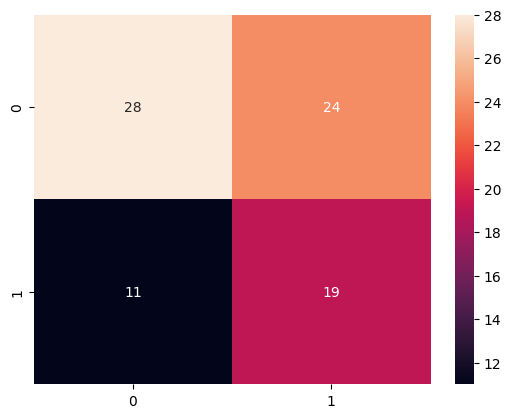

In [106]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(x_resampled,y_resampled)
y_pred = dt.predict(x_test)
score = accuracy_score(y_test,y_pred)
print("Accuracy score on testing data is: {:.2f}%".format(score * 100))
y_train_pred = dt.predict(x_resampled)  # Predict on the resampled training set
train_score = accuracy_score(y_resampled, y_train_pred)
print("Accuracy score on training data is: {:.2f}%".format(train_score * 100))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

[Voting] ...... (1 of 4) Processing Logistic Regression, total=   0.0s
[Voting] .... (2 of 4) Processing KNeighbors Classifier, total=   0.0s
[Voting] ...................... (3 of 4) Processing SVC, total=   0.0s
[Voting] . (4 of 4) Processing Decision Tree Classifier, total=   0.0s
Accuracy score on testing data is: 64.63%
Accuracy score on training data is: 73.77%


<Axes: >

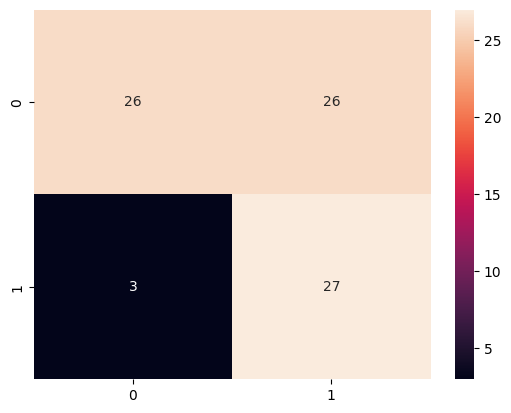

In [107]:
from sklearn.ensemble import VotingClassifier
classifiers = [("Logistic Regression",lr),("KNeighbors Classifier",knn),("SVC",svc),("Decision Tree Classifier",dt)]
vc = VotingClassifier(estimators=classifiers,voting="soft",n_jobs=1,verbose=1)
vc.fit(x_resampled,y_resampled)
y_pred = vc.predict(x_test)
score = accuracy_score(y_test,y_pred)
print("Accuracy score on testing data is: {:.2f}%".format(score * 100))
y_train_pred = vc.predict(x_resampled)  # Predict on the resampled training set
train_score = accuracy_score(y_resampled, y_train_pred)
print("Accuracy score on training data is: {:.2f}%".format(train_score * 100))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)